In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pictures as p
import utils as u
import data as d
import autoencoder as a
import keras as k
import datetime

Using TensorFlow backend.


In [2]:
imgSize = 32 # must me a power of 2
epochs = 15  # nr of passes through training dataset
stepsPerEpoch = 100

In [3]:
autoencoder = a.createConv2Autoencoder(imgSize, imgSize, 1, [32, 16, 8, 4])

autoencoder.compile(
    optimizer=k.optimizers.adadelta(),
    loss=k.losses.mse,
    metrics=[k.metrics.accuracy, k.metrics.mean_squared_error]
)

In [4]:
generator = d.trainingDataGenerator(stepsPerEpoch, imgSize, 10) # p.trainingDataGenerator(stepsPerEpoch, imgSize) # d.trainingDataGenerator(bs, imgSize, 10)
history = autoencoder.fit(x=generator, steps_per_epoch=stepsPerEpoch, epochs=epochs)

Epoch 1/15
Study area: 116 * 63 * 74
100/100 [==============================] - 12s 116ms/step - loss: 0.0651 - accuracy: 0.0000e+00 - mean_squared_error: 0.0651
Epoch 2/15
100/100 [==============================] - 13s 127ms/step - loss: 0.0179 - accuracy: 0.0000e+00 - mean_squared_error: 0.0179
Epoch 3/15
100/100 [==============================] - 11s 107ms/step - loss: 0.0175 - accuracy: 0.0000e+00 - mean_squared_error: 0.0175
Epoch 4/15
100/100 [==============================] - 10s 104ms/step - loss: 0.0172 - accuracy: 0.0000e+00 - mean_squared_error: 0.0172
Epoch 5/15
100/100 [==============================] - 10s 103ms/step - loss: 0.0171 - accuracy: 0.0000e+00 - mean_squared_error: 0.0171
Epoch 6/15
100/100 [==============================] - 10s 104ms/step - loss: 0.0170 - accuracy: 0.0000e+00 - mean_squared_error: 0.0170
Epoch 7/15
100/100 [==============================] - 11s 110ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - mean_squared_error: 0.0169
Epoch 8/15
100/100 [==

Text(0.5, 1.0, 'prediction')

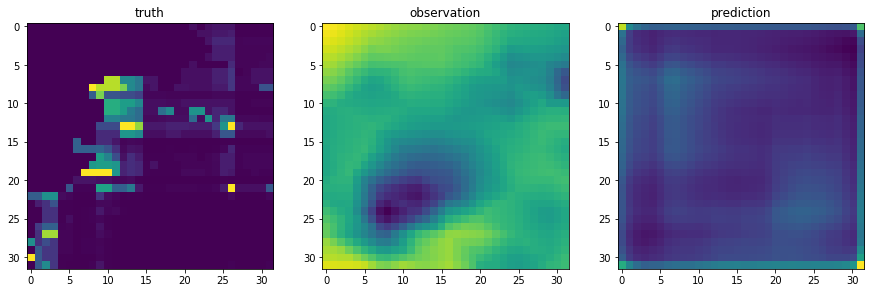

In [10]:
obsBatch, truthBatch = generator.__next__()
obs = obsBatch[0]
truth = truthBatch[0]
prediction = autoencoder.predict(obs.reshape(1, imgSize, imgSize, 1))

truthR = truth[:, :, 0]
predictionR = prediction[0, :, :, 0]
obsR = obs[:, :, 0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(truthR)
axes[0].set_title('truth')
axes[1].imshow(obsR)
axes[1].set_title('observation')
axes[2].imshow(predictionR)
axes[2].set_title('prediction')

In [6]:
dt = datetime.datetime.now().strftime("%d.%m.%Y-%H.%M.%S")
autoencoder.save(f"./outputs/autoencoder_{dt}.h5")